<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/HealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url= "https://www.iplt20.com/"
response= requests.get(url)
html= response.text


In [ ]:
soup= BeautifulSoup(html, "html.parser")

In [ ]:
table=soup.find("table")
df=pd.read_html(str(table))[0]

/tmp/ipython-input-4-1222844967.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(table))[0]


In [ ]:
df.head()

,0,1,2,3,4
0,Role,Batsman,Nationality,Indian,NaN
1,Bats,NaN,Bowls,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Bio,NaN,NaN,NaN,NaN
4,A 22-year old opening batsman who hails from P...,A 22-year old opening batsman who hails from P...,A 22-year old opening batsman who hails from P...,A 22-year old opening batsman who hails from P...,NaN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/content/medical_insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


In [4]:
df.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [6]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
discount_eligibility,0
region,0
expenses,0
premium,0


In [7]:
sns.set_style("whitegrid")

/tmp/ipython-input-9-4186020760.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=df, x="region", y="premium", color="red", hue="gender")


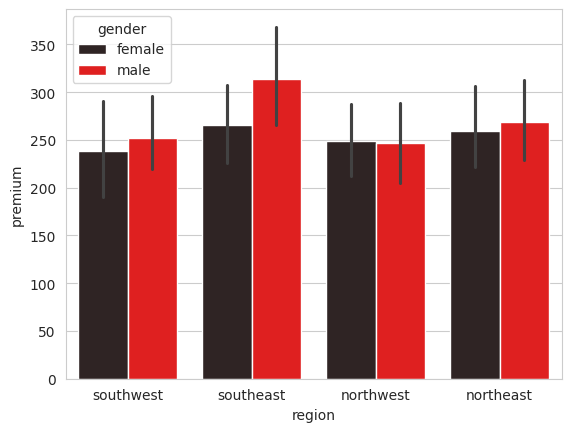

In [9]:
sns.barplot(data=df, x="region", y="premium", color="red", hue="gender")
plt.show()

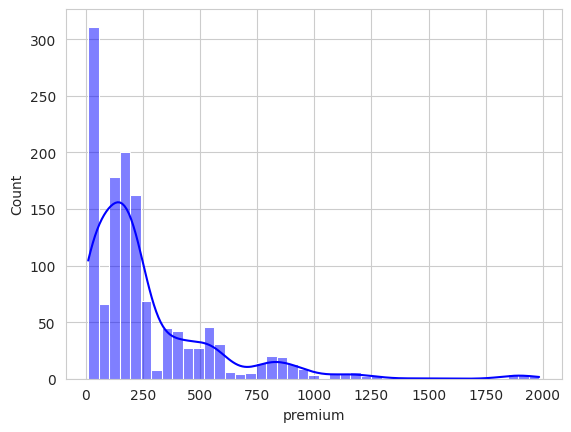

In [10]:
sns.histplot(data=df, x="premium", kde=True, color="blue")
plt.show()

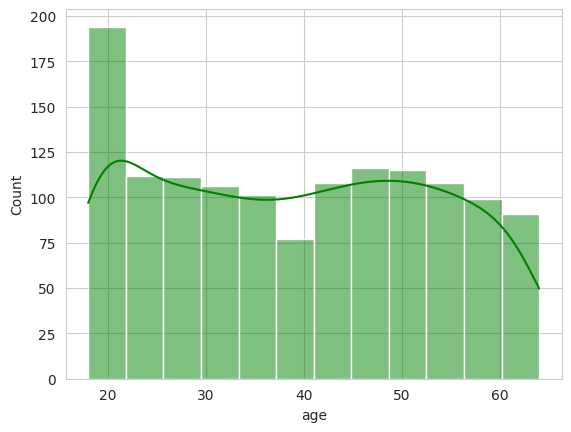

In [11]:
sns.histplot(data=df, x="age", kde= True, color="green")
plt.show()

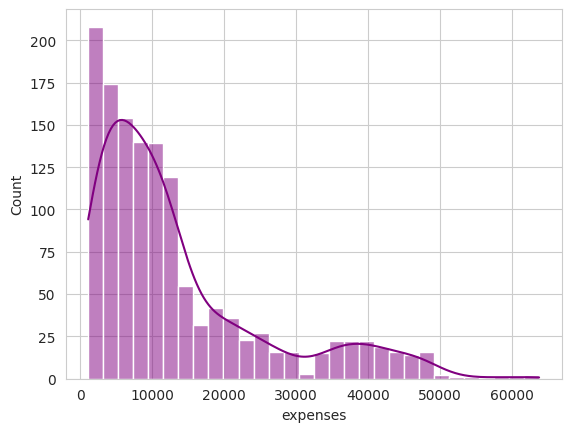

In [12]:
sns.histplot(data=df, x="expenses", kde=True, color="purple")
plt.show()

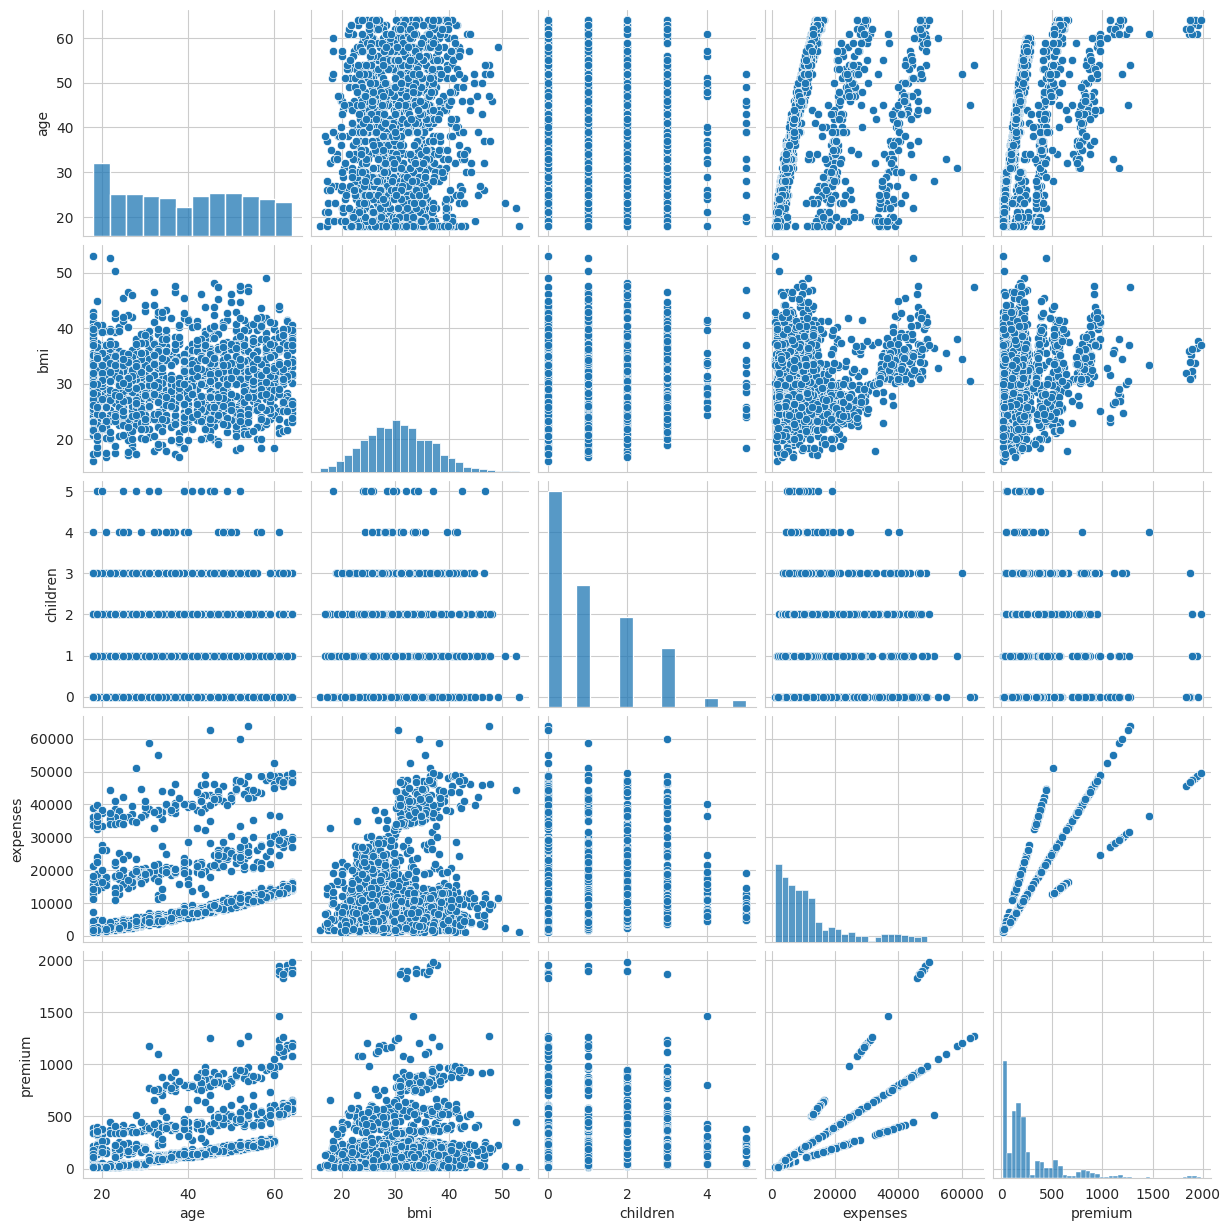

In [14]:
sns.pairplot(data=df)
plt.show()

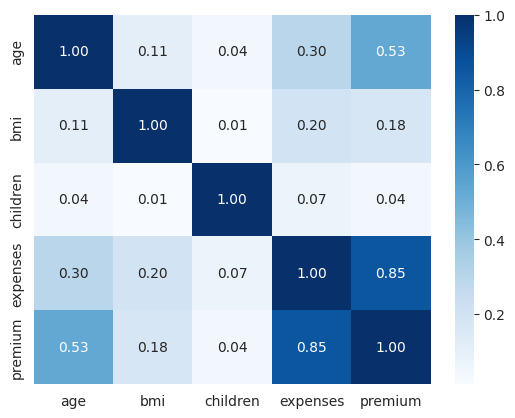

In [16]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.show()

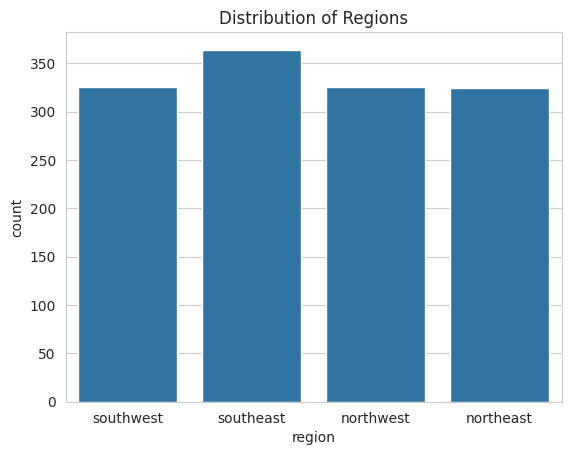


DataFrame after One-Hot Encoding:
   age   bmi  children  expenses   premium  gender_male  \
0   19  27.9         0  16884.92  168.8492        False   
1   18  33.8         1   1725.55   17.2555         True   
2   28  33.0         3   4449.46   44.4946         True   
3   33  22.7         0  21984.47  439.6894         True   
4   32  28.9         0   3866.86   77.3372         True   

   discount_eligibility_yes  region_northwest  region_southeast  \
0                      True             False             False   
1                     False             False              True   
2                     False             False              True   
3                     False              True             False   
4                     False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False  


In [18]:
# Further Data Exploration (Example: Countplot of Region)
sns.countplot(data=df, x="region")
plt.title("Distribution of Regions")
plt.show()

# Data Preprocessing: Handling Categorical Variables (One-Hot Encoding)
# We'll start by selecting the categorical columns
categorical_cols = ['gender', 'discount_eligibility', 'region']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Display the first few rows of the encoded DataFrame
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())



In [19]:
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


In [20]:
df_encoded.head()

,age,bmi,children,expenses,premium,gender_male,discount_eligibility_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,168.8492,False,True,False,False,True
1,18,33.8,1,1725.55,17.2555,True,False,False,True,False
2,28,33.0,3,4449.46,44.4946,True,False,False,True,False
3,33,22.7,0,21984.47,439.6894,True,False,True,False,False
4,32,28.9,0,3866.86,77.3372,True,False,True,False,False


In [21]:
X=df_encoded.drop("premium", axis=1)
y=df_encoded["premium"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train.shape, y_train.shape

((1070, 9), (1070,))

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred= lr.predict(X_test)

In [26]:
residuals=y_test- y_pred

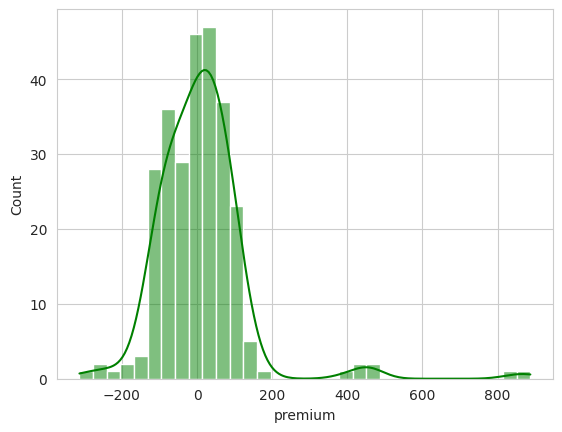

In [27]:
sns.histplot(residuals, kde=True, color="green")
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [30]:
mae= mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae, mse

(77.04215360993356, 15403.748573177001)

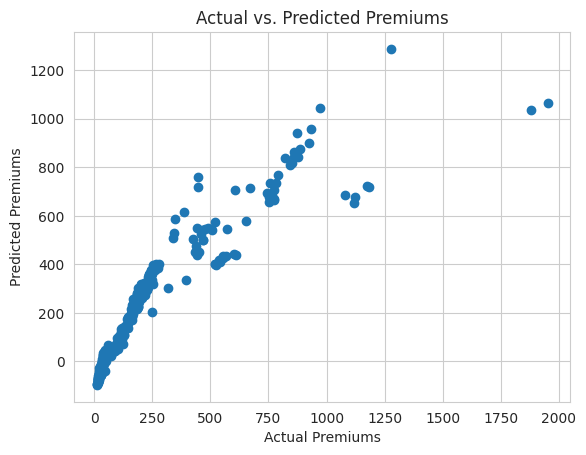

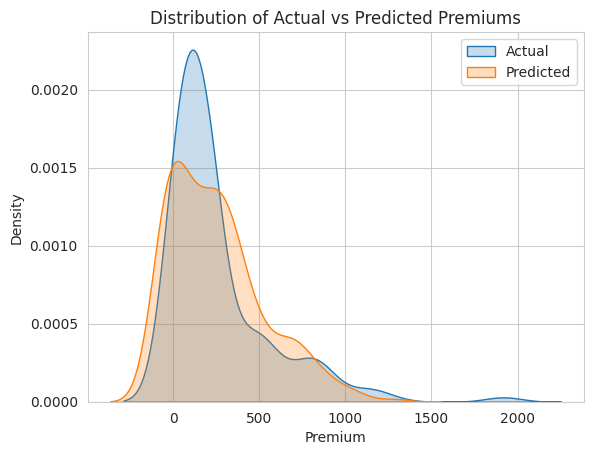

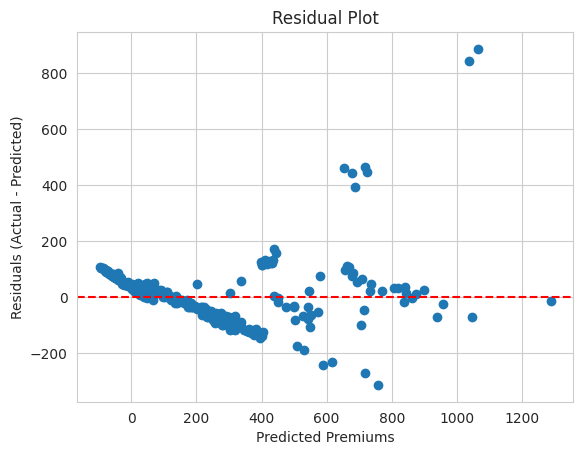

In [31]:
# prompt: visualise the results

import matplotlib.pyplot as plt
# Visualise actual vs predicted premiums
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Premiums")
plt.ylabel("Predicted Premiums")
plt.title("Actual vs. Predicted Premiums")
plt.show()

# Plot the distribution of actual vs predicted
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title('Distribution of Actual vs Predicted Premiums')
plt.xlabel('Premium')
plt.ylabel('Density')
plt.legend()
plt.show()

# Residual plot (alternative visualization)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Premiums")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()